# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete=pd.merge(study_results,mouse_metadata,how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_study_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [62]:
# Checking the number of mice.
Total_mice = mouse_metadata['Mouse ID'].count()
#school_data['school_name'].nunique()
Total_mice
print(f"Total Number of Mice : {Total_mice}") 

Total Number of Mice : 249


In [63]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


In [64]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_id = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [65]:
clean_df = mouse_study_complete[~mouse_study_complete['Mouse ID'].isin(duplicate_mice_id['Mouse ID'])]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [66]:
# Checking the number of mice in the clean DataFrame.
Total_mice_count=clean_df['Mouse ID'].nunique()
Total_mice_count
print(f'The number of unique mice in the dataframe is: {Total_mice_count}')

The number of unique mice in the dataframe is: 248


## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [68]:
#SOLUTION
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

regimen_summary=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    varience="var",
    std="std",
    sem="sem"

)
regimen_summary


,mean,median,varience,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
#df.columns = pd.MultiIndex.from_product([['tumor volume (mm3)'], df.columns])
regimen_summary =pd.MultiIndex.from_product([['Tumor Volume (mm3)'],regimen_summary.columns])
regimen_summary


MultiIndex([('Tumor Volume (mm3)',     'mean'),
            ('Tumor Volume (mm3)',   'median'),
            ('Tumor Volume (mm3)', 'varience'),
            ('Tumor Volume (mm3)',      'std'),
            ('Tumor Volume (mm3)',      'sem')],
           )

In [70]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df['Drug Regimen'].value_counts()
drug_counts


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

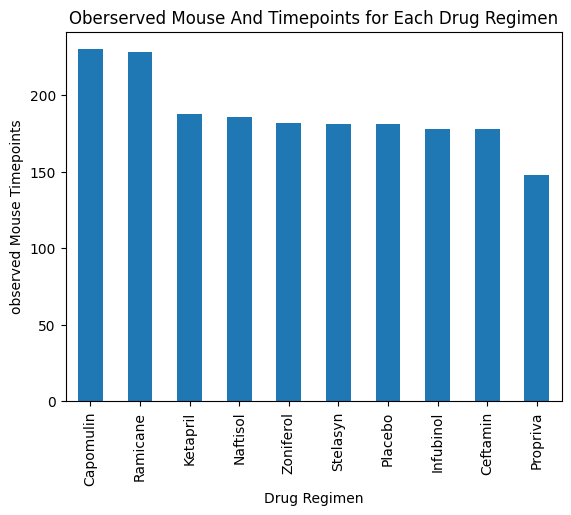

In [72]:
#Bar chart based on Panda dataframe.

drug_counts.plot(kind='bar',x='Drug Regimen', y='Number of Mice', legend=False)
plt.title('Oberserved Mouse And Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('observed Mouse Timepoints')
plt.show

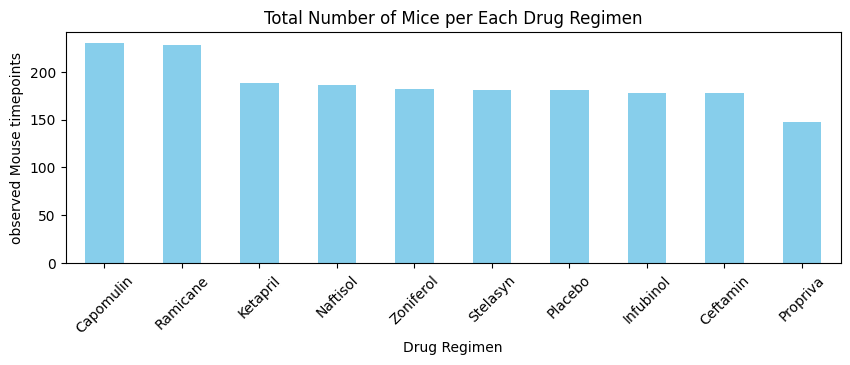

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Matplotlib
plt.figure(figsize=(10,3))
drug_counts.plot(kind='bar',x="Drug_regimens",y="observed mouse timepoint" , color='skyblue')
plt.title('Total Number of Mice per Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('observed Mouse timepoints')
plt.xticks(rotation=45)
plt.show()

In [74]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [75]:
unique_gender_df=clean_df[['Mouse ID','Sex']].drop_duplicates()
unique_gender_df

,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male
...,...,...
245,t565,Female
246,i557,Female
247,m957,Female
248,f966,Male


In [76]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [77]:
male_count = unique_gender_df['Sex'].value_counts()['Male']
male_count

print(f"Total number of male mice: {male_count}")

Total number of male mice: 125


In [78]:
percentage_male = (male_count / Total_mice_count) * 100
percentage_male
print(f"Percentage of male mice: {percentage_male:.1f}%")

Percentage of male mice: 50.4%


In [79]:
Female_count = unique_gender_df['Sex'].value_counts()['Female']
Female_count

print(f"Total number of male mice: {Female_count}")

Total number of male mice: 123


In [80]:
percentage_Female = (Female_count / Total_mice_count) * 100
percentage_Female
print(f"Percentage of Female mice: {percentage_Female:.1f}%")

Percentage of Female mice: 49.6%


In [81]:
data= {
    'Gender': ['Male', 'Female'],
    'Count': [male_count,Female_count],
    'Percentage': [percentage_male, percentage_Female]
}
Pie_chart_df = pd.DataFrame(data)
Pie_chart_df



,Gender,Count,Percentage
0,Male,125,50.403226
1,Female,123,49.596774


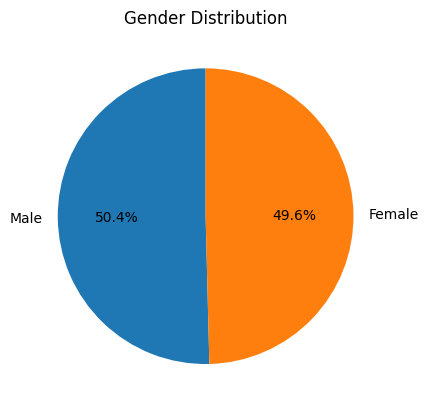

In [82]:
#pie chart using the Pandas DataFrame.plot() method:

Pie_chart_df.plot(kind='pie', y='Count', labels=Pie_chart_df['Gender'], autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Gender Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

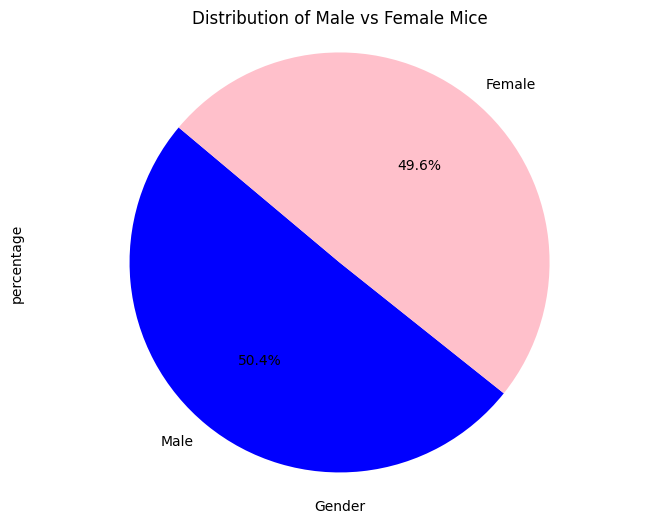

In [83]:
plt.figure(figsize=(8, 6))
plt.pie(Pie_chart_df['Count'], labels=Pie_chart_df['Gender'], autopct='%1.1f%%', startangle=140, colors=['Blue', 'Pink'])
plt.title('Distribution of Male vs Female Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.xlabel('Gender')
plt.ylabel('percentage')
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
filtered_df






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [85]:
 #Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [101]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = filtered_df.merge(last_timepoint, on=['Mouse ID', 'Timepoint'], how='left')
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,c326,0,45.000000,0,Infubinol,Female,18,25
2,c139,0,45.000000,0,Infubinol,Male,11,28
3,v339,0,45.000000,0,Infubinol,Male,20,26
4,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17
810,i177,45,33.562402,3,Ramicane,Male,10,18
811,r944,45,41.581521,2,Capomulin,Male,12,25
812,u364,45,31.023923,3,Capomulin,Male,18,17


In [102]:
# Display the final tumor volume for each mouse
final_tumor_volumes = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volumes
print(final_tumor_volumes)

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       b128    Capomulin           45.000000
1       c326    Infubinol           45.000000
2       c139    Infubinol           45.000000
3       v339    Infubinol           45.000000
4       a577    Infubinol           45.000000
..       ...          ...                 ...
809     a644     Ramicane           32.978522
810     i177     Ramicane           33.562402
811     r944    Capomulin           41.581521
812     u364    Capomulin           31.023923
813     p438     Ceftamin           61.433892

[814 rows x 3 columns]


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volumes['Drug Regimen'].unique().tolist()
treatments


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


['Capomulin', 'Infubinol', 'Ramicane', 'Ceftamin']

In [105]:
# Create empty list to fill with tumor vol data (for plotting)
# Example of using the treatments list in a for loop for plotting
tumor_vol_data = {treatment: [] for treatment in treatments}
tumor_vol_data




{'Capomulin': [], 'Infubinol': [], 'Ramicane': [], 'Ceftamin': []}

In [107]:
# Fill the dictionary with tumor volume data
for treatment in treatments:
    volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].tolist()
    tumor_vol_data[treatment] = volumes
    # Print the treatments and the tumor volume data
    print("Treatments:", treatment)
    print("Tumor Volume Data:", treatment, tumor_vol_data[treatment])


    


Treatments: Capomulin
Tumor Volume Data: Capomulin [45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.85119285, 45.46224327, 39.20212894, 43.1809774, 45.89372032, 41.40859145, 45.76088647, 41.53409702, 45.70443431, 38.79647373, 45.47375302, 45.83899787, 42.2616653, 41.01991315, 44.02275246, 45.59706359, 45.73714484, 45.78174579, 43.87849569, 45.59568527, 45.64143788, 45.8956472, 45.65133131, 45.83939976, 45.62238149, 39.0054935, 46.56841719, 39.84822328, 46.30400254, 43.68802627, 46.75907363, 43.42101414, 46.4145177, 46.42536551, 42.99207658, 44.50204246, 41.63001026, 35.6244027, 36.82536664, 46.15473721, 46.54429202, 43.23196275, 39.95234669, 46.74900552, 37.61494768, 43.2708519, 41.99922813, 39.11389068, 46.4083613, 46.05960827, 38.17723195, 43.78489343, 42.17230079, 37.97877782, 39.80445341, 47.37342325, 42.28366512, 44.44094861, 43.31265415, 46.53920617, 45.21674299, 35.46375763, 

In [108]:



# Create a list of tumor volume data for each treatment
box_plot_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in tumor_vol_data.items()]))
box_plot_df





,Capomulin,Infubinol,Ramicane,Ceftamin
0,45.000000,45.0,45.000000,45.0
1,45.000000,45.0,45.000000,45.0
2,45.000000,45.0,45.000000,45.0
3,45.000000,45.0,45.000000,45.0
4,45.000000,45.0,45.000000,45.0
...,...,...,...,...
225,40.728578,NaN,37.225650,NaN
226,38.125164,NaN,32.978522,NaN
227,47.685963,NaN,33.562402,NaN
228,41.581521,NaN,NaN,NaN


                 25%        50%        75%        IQR  \
Capomulin  37.685933  41.557809  45.000000   7.314067   
Infubinol  47.312353  51.820584  57.314444  10.002091   
Ramicane   36.674635  40.673236  45.000000   8.325365   
Ceftamin   47.208427  51.776157  56.801438   9.593010   

                             Outliers       Mean     Median  
Capomulin  [25.47214326, 23.34359787]  40.675741  41.557809  
Infubinol                          []  52.884795  51.820584  
Ramicane                [22.05012627]  40.216745  40.673236  
Ceftamin                           []  52.591172  51.776157  


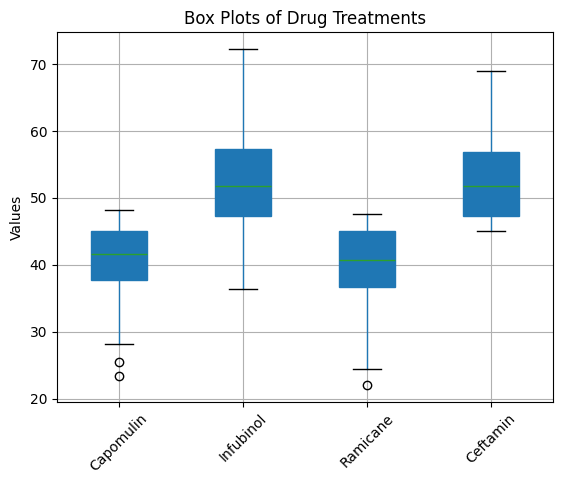

In [109]:
# Calculate statistics
stats = box_plot_df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']

# Calculate outliers
outliers = {}
for column in box_plot_df.columns:
    Q1 = stats.loc[column, '25%']
    Q3 = stats.loc[column, '75%']
    IQR = stats.loc[column, 'IQR']
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = box_plot_df[(box_plot_df[column] < lower_bound) | (box_plot_df[column] > upper_bound)][column].tolist()

stats['Outliers'] = pd.Series(outliers)
stats['Mean'] = box_plot_df.mean()
stats['Median'] = box_plot_df.median()

print(stats[['25%', '50%', '75%', 'IQR', 'Outliers', 'Mean', 'Median']])

# Create box plots
fig, ax = plt.subplots()
box_plot_df.boxplot(ax=ax, patch_artist=True)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set title and labels
ax.set_title('Box Plots of Drug Treatments')
ax.set_ylabel('Values')

# Show plot
plt.show()

## Line and Scatter Plots

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id ='l509'
capomulin_data = merged_df[merged_df['Mouse ID'] == mouse_id]
capomulin_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
81,l509,0,45.000000,0,Capomulin,Male,17,21
102,l509,5,45.851193,0,Capomulin,Male,17,21
217,l509,10,46.759074,0,Capomulin,Male,17,21
360,l509,15,47.488599,1,Capomulin,Male,17,21
404,l509,20,48.070452,2,Capomulin,Male,17,21
476,l509,25,44.006257,2,Capomulin,Male,17,21
588,l509,30,44.708055,2,Capomulin,Male,17,21
634,l509,35,40.207288,2,Capomulin,Male,17,21
734,l509,40,40.770813,2,Capomulin,Male,17,21
757,l509,45,41.483008,3,Capomulin,Male,17,21


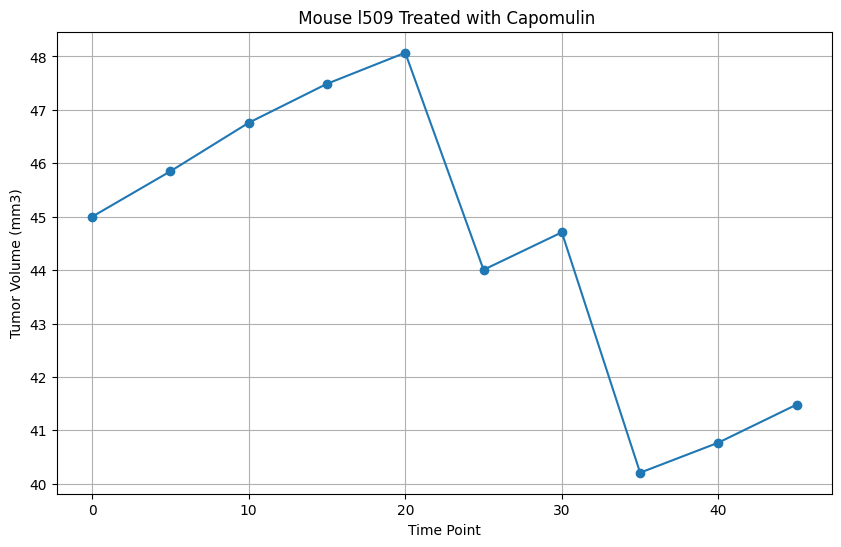

In [111]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
plt.title(f' Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_Regimen=clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_Regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [113]:
avg_tumor_volume = capomulin_Regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_Regimen.groupby('Mouse ID')['Weight (g)'].mean()
mouse_weight
avg_tumor_volume


Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

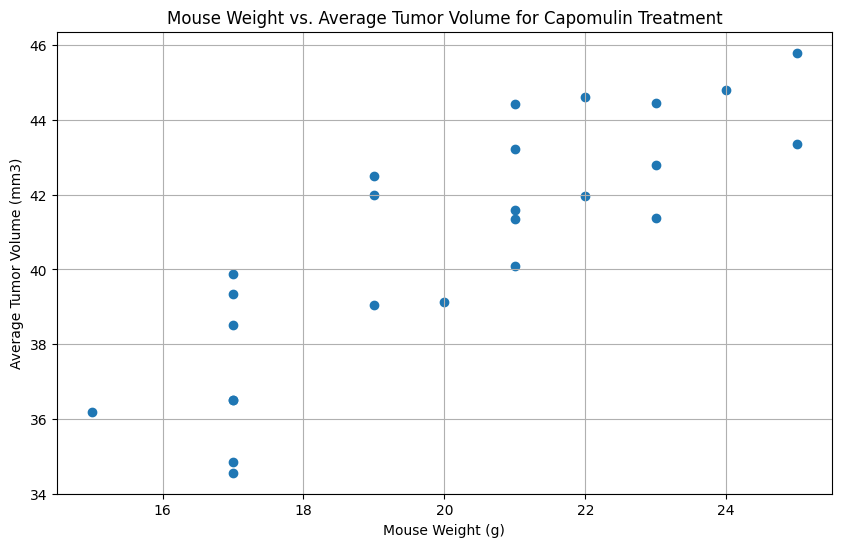

In [114]:
# Create a DataFrame with mouse weight and average tumor volume
scatter_data = pd.DataFrame({
    'Mouse Weight (g)': mouse_weight,
    'Average Tumor Volume (mm3)': avg_tumor_volume
})

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Mouse Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

In [115]:
correlation = avg_tumor_volume.corr(mouse_weight)
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.8419363424694721


In [116]:
from scipy.stats import linregress
#Perform linear regression:
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)
print(f'Slope: {slope}, Intercept: {intercept}, r_value : {r_value} , p_value : {p_value}, std_err : {std_err} ' )

Slope: 0.9544396890241049, Intercept: 21.552160532685008, r_value : 0.8419363424694721 , p_value : 1.3225722434712404e-07, std_err : 0.12754359033201323 


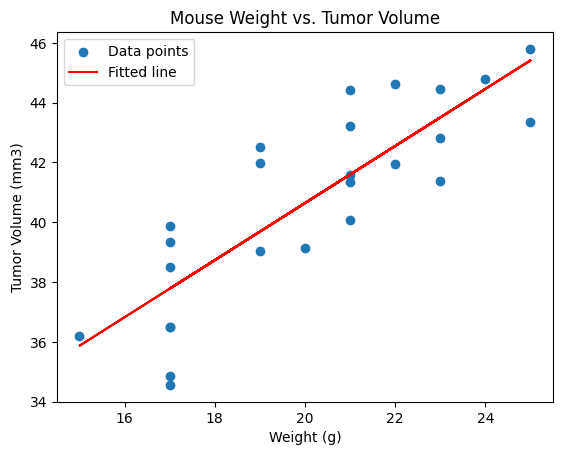

In [117]:
plt.scatter(mouse_weight, avg_tumor_volume, label='Data points')

plt.plot(mouse_weight, intercept + slope * mouse_weight, 'r', label='Fitted line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume')
plt.legend()
plt.show()